  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20461  100 20461    0     0  31152      0 --:--:-- --:--:-- --:--:-- 31143


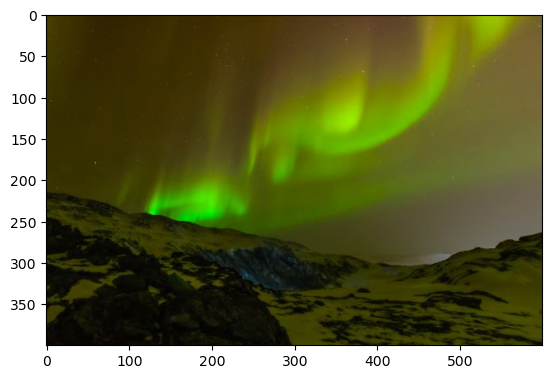

In [1]:
#Bibliotecas básicas e baixando imagem de teste.
import cv2 as cv
import numpy as np
import io
from matplotlib import pyplot as plt
# Import math Library
import math

# Download sample image from internet
!curl -O 'https://www.w3schools.com/w3images/lights.jpg'
img = cv.imread('lights.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
cv.imshow('Source Image', img)
cv.waitKey(0)
cv.destroyAllWindows()
# Alternativa é o matlibplot, mas ele troca os canais. Vamos corrigir isso mais para frente.
plt.imshow(img)

33


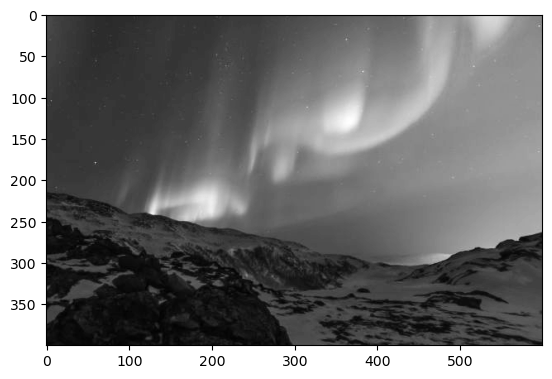

In [2]:
gimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gimg, cmap='gray')
print(gimg[100][100])

In [3]:
M,N = gimg.shape
print(M,N)

400 600


In [18]:
addition = np.zeros((M, N), np.uint8)
for x in range(N):
    for y in range(M):
        addition[y,x] = min(255,gimg[y,x]+150)

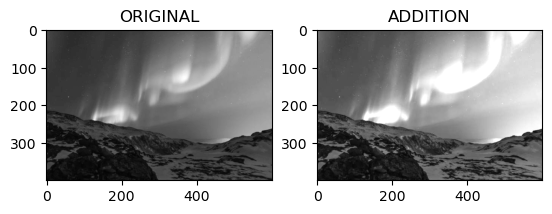

In [19]:
plt.subplot(121),plt.imshow(gimg,'gray'),plt.title('ORIGINAL')
plt.subplot(122),plt.imshow(addition,'gray'),plt.title('ADDITION')
plt.show()

In [43]:
clone = np.zeros((M, N), np.uint8)
print("src shape: ", gimg.shape, ", tgt shape: ", clone.shape)
print("src type: ", gimg.dtype, ", tgt shape: ", clone.dtype)

src shape:  (400, 600) , tgt shape:  (400, 600)
src type:  uint8 , tgt shape:  uint8


In [44]:
theta = -math.pi / 8
print("theta degrees: ", 180.0 * theta / math.pi)
for u in range(N):
    for v in range(M):
        x = round(u*math.cos(theta) - v*math.sin(theta))
        y = round(u*math.sin(theta) + v*math.cos(theta))
        if (x >= 0) and (y>=0) and (x<N) and (y<M):
            clone[v,u]=gimg[y,x]
        else:
            clone[v,u]=0

theta degrees:  -22.5


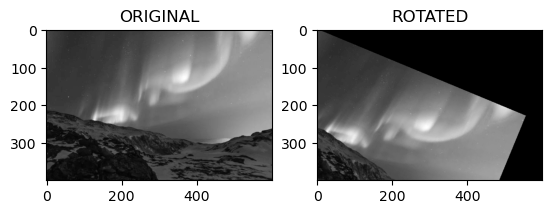

In [45]:
plt.subplot(121),plt.imshow(gimg,'gray'),plt.title('ORIGINAL')
plt.subplot(122),plt.imshow(clone,'gray'),plt.title('ROTATED')
plt.show()

In [46]:
complement = np.zeros((M, N), np.uint8)
max_int = np.max(gimg)
for x in range(N):
    for y in range(M):
        complement[y,x] = max_int-gimg[y,x]
print("max: ", max_int)

max:  157


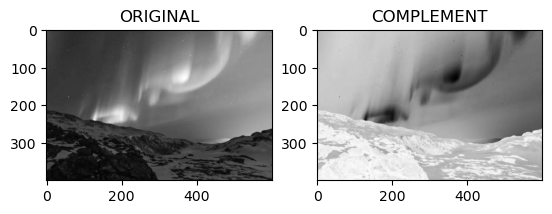

In [47]:
plt.subplot(121),plt.imshow(gimg,'gray'),plt.title('ORIGINAL')
plt.subplot(122),plt.imshow(complement,'gray'),plt.title('COMPLEMENT')
plt.show()

In [62]:
simplified = np.zeros((M, N), np.uint8)
bits = 3
divisor = 2**bits
print("bits: ", bits, ", divisor: ", 2**bits)
for x in range(N):
    for y in range(M):
        simplified[y,x] = gimg[y,x] / divisor
        simplified[y,x] *= divisor

bits:  3 , divisor:  8


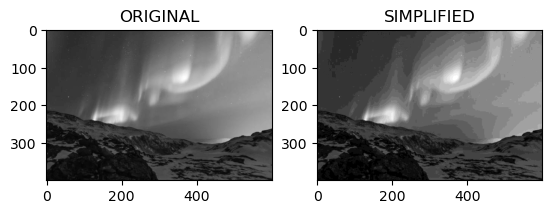

In [63]:
plt.subplot(121),plt.imshow(gimg,'gray'),plt.title('ORIGINAL')
plt.subplot(122),plt.imshow(simplified,'gray'),plt.title('SIMPLIFIED')
plt.show()

In [64]:
histogram = np.zeros(256, int)
print(histogram)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[   3   29  141  426  976 1883 2500 2935 3107 3035 2870 2737 2473 2337
 2076 1840 1726 1460 1391 1276 1281 1225 1140 1180 1065 1132 1199 1591
 2213 2124 2478 3664 4113 6790 8591 5385 3794 3846 3015 3259 3732 3797
 3689 3679 3338 3188 3114 2705 2955 2639 2113 1887 1868 1613 1471 1305
 1222 1299 1301 1189 1468 1566 1682 1836 1882 1524 1285 1179 1195 1254
 1400 1503 1671 1643 1332 1271 1392 1413 1538 1653 1377 1541 2050 2223
 2152 2392 2004 2682 3753 3939 4700 3968 2598 2457 2433 2189 1935 2007
 1680 1185 1168  967  988  997  863  772  688  633  550  585  552  559
  549  544  531  559  540  502  467  482  485  508  526  462  344  199
  150  185  122  140  152  111  154  145  130  116   88   91   86   89
  105   90   80   64   75   54   64   56   41   29   28   32   36   26
   27   29   22    1    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

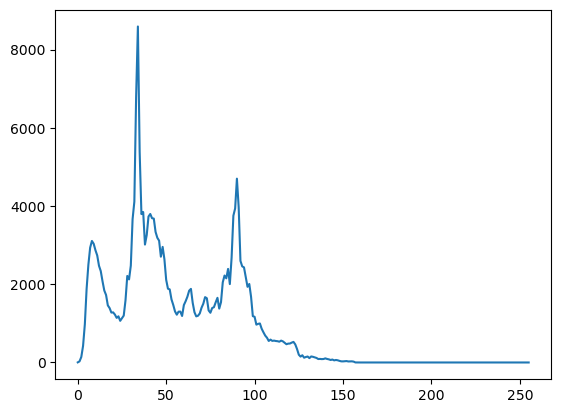

In [65]:
for x in range(N):
    for y in range(M):
        histogram[gimg[y,x]] += 1
print(histogram)
plt.plot(histogram)
plt.show()

[   1   22   29   27   26   36   32   28   29   41   56   64   54   75
   64   80   90  105   89   86   91   88  116  130  145  154  111  152
  140  122  185  150  199  344  462  526  508  485  482  467  502  540
  559  531  544  549  559  552  585  550  633  688  772  863  997  988
  967 1168 1185 1680 2007 1935 2189 2433 2457 2598 3968 4700 3939 3753
 2682 2004 2392 2152 2223 2050 1541 1377 1653 1538 1413 1392 1271 1332
 1643 1671 1503 1400 1254 1195 1179 1285 1524 1882 1836 1682 1566 1468
 1189 1301 1299 1222 1305 1471 1613 1868 1887 2113 2639 2955 2705 3114
 3188 3338 3679 3689 3797 3732 3259 3015 3846 3794 5385 8591 6790 4113
 3664 2478 2124 2213 1591 1199 1132 1065 1180 1140 1225 1281 1276 1391
 1460 1726 1840 2076 2337 2473 2737 2870 3035 3107 2935 2500 1883  976
  426  141   29    3    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

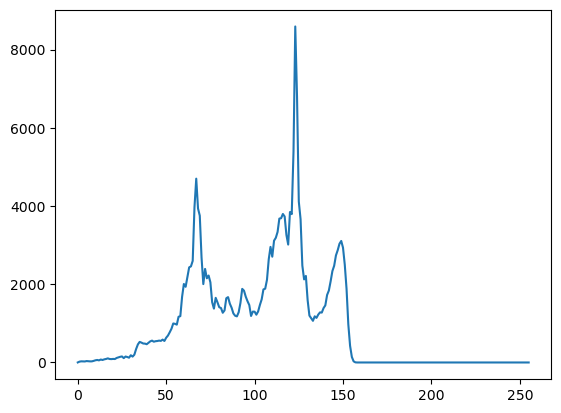

In [66]:
comp_histogram = np.zeros(256, int)
for x in range(N):
    for y in range(M):
        comp_histogram[complement[y,x]] += 1
print(comp_histogram)
plt.plot(comp_histogram)
plt.show()

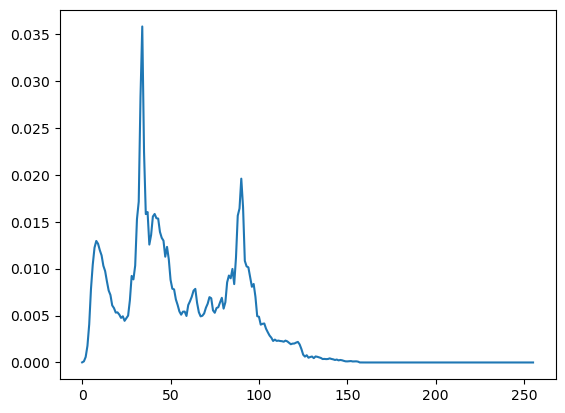

In [67]:
norm_histogram = np.zeros(256, float)
total = M*N
for r in range(256):
    norm_histogram[r] = 1.0 * histogram[r] / total
plt.plot(norm_histogram)
plt.show()

In [68]:
hist_sum = 0.0
for r in range(256):
    hist_sum += norm_histogram[r]
print("hist_sum: ", hist_sum)

hist_sum:  0.9999999999999998


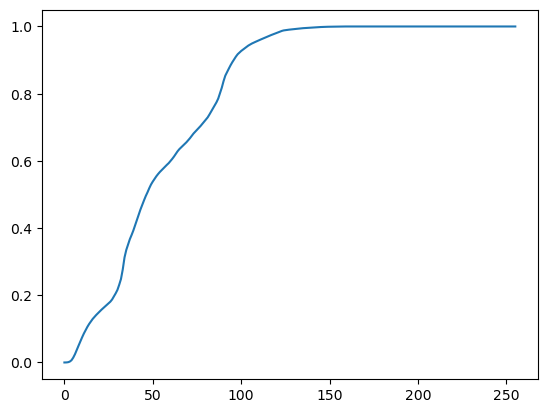

In [69]:
sum_histogram = np.zeros(256, float)
sum_histogram[0] = norm_histogram[0]
for r in range(255):
    sum_histogram[r+1] = sum_histogram[r]+ norm_histogram[r+1]
plt.plot(sum_histogram)
plt.show()

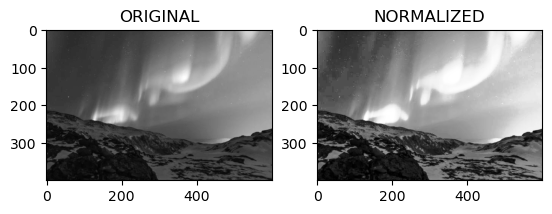

In [70]:
normalized = np.zeros((M, N), np.uint8)
for x in range(N):
    for y in range(M):
        normalized[y,x] = round((sum_histogram[gimg[y,x]]*max_int))
plt.subplot(121),plt.imshow(gimg,'gray'),plt.title('ORIGINAL')
plt.subplot(122),plt.imshow(normalized,'gray'),plt.title('NORMALIZED')
plt.show()

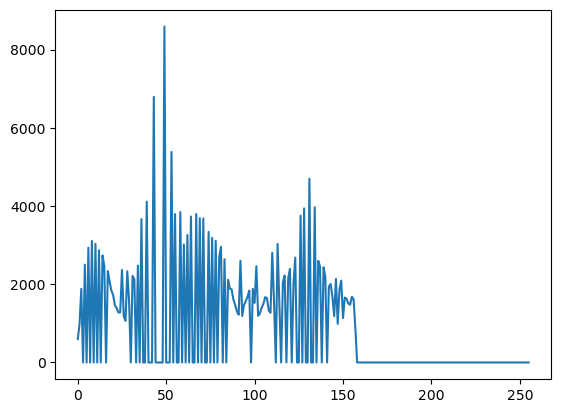

In [71]:
new_histogram = np.zeros(256, int)
for x in range(N):
    for y in range(M):
        new_histogram[normalized[y,x]] += 1
plt.plot(new_histogram)
plt.show()